<a id='table_of_contents'></a>

# Table of Contents
&emsp; [Import Libraries](#import_libraries) <br> <br>
&emsp; [Load Data](#load_data) <br> <br>
[1. Data Understanding & Feature Analysis](#data_understanding_feature_analysis) <br> <br>
&emsp; [1.1 Visualization](#visualization) <br> <br>
&emsp; [1.2 Feature Analysis](#feature_analysis) <br> <br>
[2. Data Wrangling & Preprocessing](#data_wrangling_preprocessing) <br> <br>
&emsp; [2.1 Bryan Ling Zehao](#bryan_ling_zehao) <br> <br>
&emsp; &emsp; [2.11 Remove Unwanted Columns](#remove_unwanted_columns_bryan) <br> <br>
&emsp; &emsp; [2.12 Handle Missing Values](#handle_missing_values_bryan) <br> <br>
&emsp; &emsp; [2.13 Categorical Data Encoding](#categorical_data_encoding_bryan) <br> <br>
&emsp; &emsp; [2.14 Data Imputation](#data_imputation_bryan) <br> <br>
&emsp; &emsp; [2.15 Feature Selection](#feature_selection_bryan) <br> <br>
&emsp; [2.2 Chai Xiang Zhi](#chai_xiang_zhi) <br> <br>
&emsp; &emsp; [2.21 Feature Imputation](#feature_imputation_xz) <br> <br>
&emsp; &emsp; [2.22 Feature Binning & Discretisation](#feature_binning_and_discretisation_xz) <br> <br>
&emsp; &emsp; [2.23 Feature Engineering & Combination](#feature_engineering_and_combination_xz) <br> <br>
&emsp; &emsp; [2.24 Drop Features](#drop_featues_xz) <br> <br>
&emsp; &emsp; [2.25 Datatype Transformation](#datatype_transformation_xz) <br> <br>
&emsp; &emsp; [2.26 Numerical Feature Normalisation](#numerical_feature_normalisation_xz) <br> <br>
&emsp; &emsp; [2.27 Target Value & Categorical Feature Encoding](#target_value_and_categorical_feature_encoding_xz) <br> <br>
[3. Exploratory Data Analysis (EDA)](#eda) <br> <br>
[4. Model Development](#model_development) <br> <br>
&emsp; [4.1 Baseline Models Overview](#baseline_models_overview) <br> <br>
&emsp; [4.2 Hyperparameter Tuning](#hyperparameter_tuning) <br> <br>
[5. Model Evaluation](#model_evaluation) <br> <br>
&emsp; [5.1 K-fold Cross Validation](#k_fold_cross_validation) <br> <br>
&emsp; [5.2 F1 Score](#f1_score) <br> <br>
&emsp; [5.3 Confusion Matrix](#confusion_matrix) <br> <br>
&emsp; [5.4 ROC](#roc) <br> <br>
[6. Model Deployment](#model_deployment) <br> <br>
&emsp; [6.1 Final Modelling using entire Training Dataset](#f) <br> <br>
&emsp; [6.2 Predict Test Set](#f) <br> <br>

<a id='import_libraries'></a>
## Import Libraries

###### &emsp; &emsp; &emsp; &nbsp; &nbsp;[Table of Contents](#table_of_contents)

##### &emsp; &emsp; Data Understanding and Feature Analysis Libraries

In [87]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Features summary
from fast_ml import eda
from fast_ml.utilities import display_all

# Missing data visualisation
import missingno as msno

##### &emsp; &emsp; Data Preprocessing Libraries

In [88]:
# Multivariaate feature imputation method
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier

# Categorical feature encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Feature selection
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif, RFE

# Feature binning on funder & installer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

# Numerical feature normalisation
from scipy.stats import zscore

##### &emsp; &emsp; Modelling & Model Evaluation Libraries

In [89]:
# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Model saving
import pickle

# Model evaluation
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, ConfusionMatrixDisplay, accuracy_score

<a id='load_data'></a>
## Load Data
###### &emsp; &emsp; &emsp; &nbsp; &nbsp;[Table of Contents](#table_of_contents)

In [90]:
# Read the training set for each member of the group
df_xiang_zhi = pd.read_csv('./dataset/data_mining_water_table.csv')
df_bryan = pd.read_csv('./dataset/data_mining_water_table.csv')

---
<a id='data_understanding_feature_analysis'></a>
# 1. Data Understanding & Feature Analysis
###### &emsp; &emsp; &emsp; &nbsp; &nbsp;[Table of Contents](#table_of_contents)

---
<a id='data_wrangling_preprocessing'></a>
# 2. Data Wrangling & Preprocessing
###### &emsp; &emsp; &emsp; &nbsp; &nbsp;[Table of Contents](#table_of_contents)

<a id='bryan_ling_zehao'></a>
## &emsp; 2.1 Bryan Ling Zehao
###### &emsp; &emsp; &emsp; &nbsp; &nbsp;[Table of Contents](#table_of_contents)

<a id='remove_unwanted_columns_bryan'></a>
### &emsp; &emsp; 2.11 Remove Unwanted Columns

<a id='handle_missing_values_bryan'></a>
### &emsp; &emsp; 2.12 Handle Missing Values

<a id='categorical_data_encoding_bryan'></a>
### &emsp; &emsp; 2.13 Categorical Data Encoding

<a id='data_imputation_bryan'></a>
### &emsp; &emsp; 2.14 Data Imputation

<a id='feature_selection_bryan'></a>
### &emsp; &emsp; 2.15 Feature Selection

<a id='chai_xiang_zhi'></a>
## &emsp; 2.2 Chai Xiang Zhi
###### &emsp; &emsp; &emsp; &nbsp; &nbsp;[Table of Contents](#table_of_contents)

#### &emsp; &emsp; &emsp; Custom Functions for Preprocessing

In [91]:
"""
This function encodes categorical features
"""

# Code adapted from https://stackoverflow.com/questions/58217005/how-to-reverse-label-encoder-from-sklearn-for-multiple-columns
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output

In [92]:
"""
This function imputes features based on location/geographical granularity
"""

# imp_column: Feature/column to impute
# groupby_features: Features to groupby
# transform_method: Method to apply to transformation, etc. mean, median, mode...
# df_waterpoint: The dataframe to be altered
def location_based_imputation(imp_column, groupby_features, transform_method, df_waterpoint):
    transformed_features = []
    included_features = groupby_features.copy()
    
    # Create a list to store the apply 'method' of location from smallest geographical area to the biggest
    for _ in groupby_features:
        transformed_features.append(df_waterpoint.groupby(included_features)[imp_column].transform(transform_method))
        included_features.pop()
        
    # Impute 'nan' base on the computed mean value of its correspond features 
    for transformed_feature in transformed_features:
        df_waterpoint[imp_column].fillna(transformed_feature, inplace=True)

In [93]:
sb_stemmer = SnowballStemmer('english')

government_keyword = ['gov', 'government', 'council', 'ministry', 'government', 'goverm', 'agency',
                      'district', 'department', 'tanzania', 'lga', 'dwe', 'dwsp', 'tasaf', 
                      'rwssp', 'wsdp', 'dmdd', 'water', 'depar', 'dhv', 'rwe']

religious_keyword = ['churc', 'catholic', 'muslim', 'mission', 'KKKT', 'Kanisa', 'lutherean', 'church', 
                     'TCRS', 'islam', 'Roman', 'sister', 'RC']

aid_keyword = ['aid', 'red cross', 'oxfam', 'unicef', 'world', 'world vision', 'adb', 'amref', 'adra',
               'acra', 'africa', 'club', 'quick', 'care', 'wfp', 'foundation', 'concern']

international_keyword = ['italy', 'japan', 'german', 'korea', 'niger', 'frankfurt', 'british', 'netherlands', 
                         'embassy', 'u.s.a', 'european union', 'holland', 'international', 'africa', 'finland', 
                         'unesco', 'irish', 'greec', 'swisland', 'imf', 'china','swedish', 'HIFAB', 'NORAD', 
                         'HESAWA', 'DANIDA', 'RUDEP', 'CES', 'GMBH', 'JICA', 'JAICA', 'belgian']

community_keyword = ['village', 'municipal', 'local', 'community', 'SHIPO', 'TWESA', 'SEMA', 'coun', 'commu']

private_keyword = ['private', 'individual', 'company', ' co', 'ltd', 'gold', 'construction', 'contractor',
                   'drilling']

# unknown includes entries with 1 character, nan and below list keyword
unknown_keyword = ['0', 'no', 'not known', 'none']

"""
This function bin the values of funder & installer into 7 main categories including
Government, Relgious, Aid, International, Community, Private and Unknown.
"""

def funder_installer_binning(value):
    
    if value is np.nan or len(value) == 0:
        return 'Unknown'
    
    if binning_helper(value, government_keyword):
        return 'Government'
    
    if binning_helper(value, aid_keyword):
        return 'Aid'
    
    if binning_helper(value, religious_keyword):
        return 'Religious'
    
    if binning_helper(value, international_keyword):
        return 'International'
    
    if binning_helper(value, community_keyword):
        return 'Community'
    
    if binning_helper(value, private_keyword):
        return 'Private'
    
    if value in unknown_keyword or value == len(value) * value[0]:
        return 'Unknown'
    
    return 'Other'


def binning_helper(value, keywords):
    tokenize_words = word_tokenize(value)
    stem_keywords = [sb_stemmer.stem(word) for word in keywords]

    for word in tokenize_words:
        stem_word = sb_stemmer.stem(word)
        if any(keyword in stem_word for keyword in stem_keywords):
            return True

        elif stem_word in stem_keywords:
            return True

    return False

In [94]:
"""
This function visualises the data as a countplot with the percentages for each hue/bar.
"""

def countplot_w_percentage(df_in, fig_size, x_value, hue_value, title, legend_position):
    df_temp = df_in.copy()
    
    plt.subplots(figsize=fig_size)
    target_countplot = sns.countplot(data=df_temp, x=x_value, hue=hue_value)

    for patch in target_countplot.patches:
        percentage = '{:.2f}%'.format(100 * patch.get_height() / df_temp.shape[0])
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height() + patch.get_height() * 0.01
        target_countplot.annotate(percentage, (x, y), ha='center')

    plt.legend(loc=legend_position)
    plt.title(title)
    plt.show()

<a id='feature_imputation_xz'></a>
### &emsp; &emsp; 2.21 Feature Imputation

#### &emsp; &emsp; &emsp; 2.211 gps_height
 &emsp; &emsp; &emsp; &emsp; - Impute the gps_height's missing values using location based imputation. <br>
&emsp; &emsp; &emsp; &emsp; - Granularity (largest to smallest): basin -> region -> region_code -> district_code -> lga -> ward -> subvillage.

In [95]:
# Replace all negative and missing values with 0
df_xiang_zhi.loc[df_xiang_zhi['gps_height'] < 0, 'gps_height'] = 0
df_xiang_zhi['gps_height'].replace(0, np.nan, inplace=True)

In [96]:
# Location features to based on
location_features = ['basin', 'region', 'region_code', 'district_code', 'lga', 'ward', 'subvillage']
# Impute gps_height groupby location_features' mean
location_based_imputation('gps_height', location_features, 'mean', df_xiang_zhi)

# Remove the floating points from the byproduct of mean
df_xiang_zhi['gps_height'] = round(df_xiang_zhi['gps_height'])

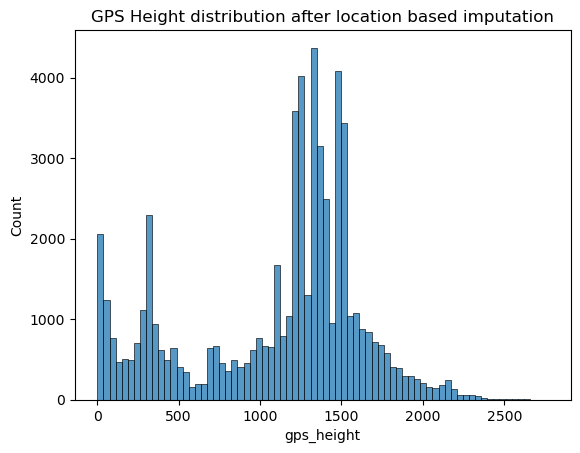

In [97]:
sns.histplot(data=df_xiang_zhi, x='gps_height')
plt.title('GPS Height distribution after location based imputation')
plt.show()

#### &emsp; &emsp; &emsp; 2.212 latitude & longitude
&emsp; &emsp; &emsp; &emsp; - Same imputation method as gps_height.

In [98]:
# Replace the missing values with 'Nan' value
df_xiang_zhi['longitude'].replace(0, np.nan, inplace=True)
df_xiang_zhi['latitude'].replace(-2.000000e-08, np.nan, inplace=True)

# Location features to based on
location_features = ['region', 'region_code', 'district_code', 'lga', 'ward', 'subvillage']
# Impute longitude & latitude groupby location_features' mean
location_based_imputation('longitude', location_features, 'mean', df_xiang_zhi)
location_based_imputation('latitude', location_features, 'mean', df_xiang_zhi)

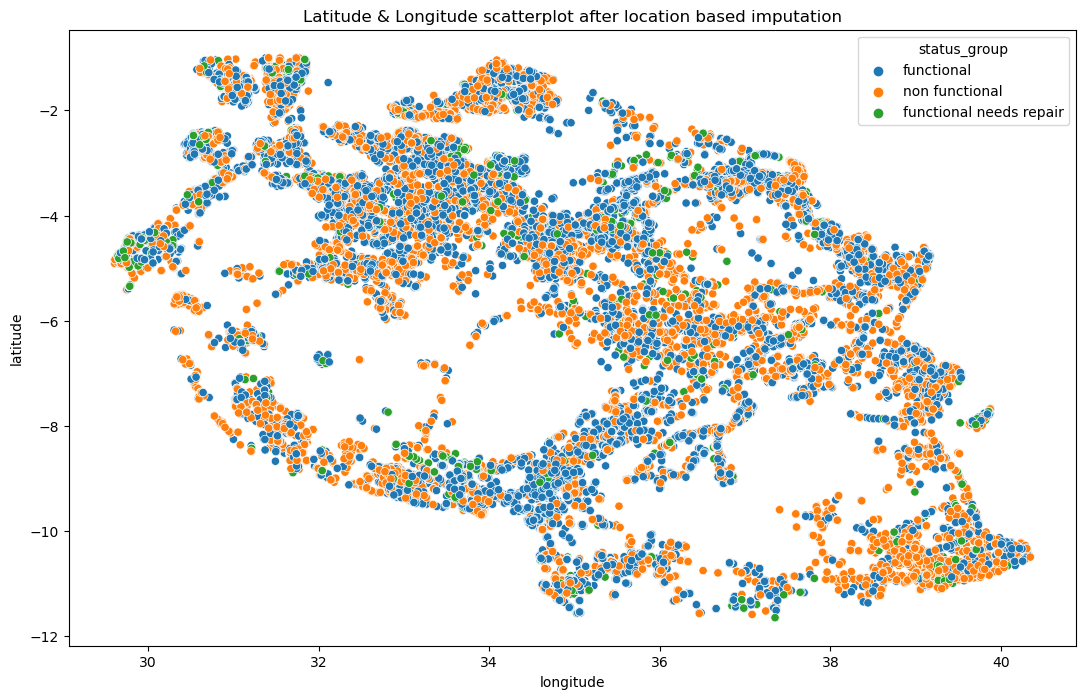

In [99]:
plt.subplots(figsize=(13, 8))
sns.scatterplot(data=df_xiang_zhi, x='longitude', y='latitude', hue='status_group')
plt.title('Latitude & Longitude scatterplot after location based imputation')
plt.show()

#### &emsp; &emsp; &emsp; 2.213 population
&emsp; &emsp; &emsp; &emsp; - The data is skewed due to the outliers, therefore median imputation is employed as mean would heavily influenced the distribution. <br>
&emsp; &emsp; &emsp; &emsp; - Same imputation method as gps_height, latitude & longitude.

In [100]:
# Replace the missing values with 'Nan' value
df_xiang_zhi['population'].replace(0, np.nan, inplace=True)

In [101]:
# Location features to based on
location_features = ['basin', 'region', 'region_code', 'district_code', 'lga', 'ward', 'subvillage']
# Impute population groupby location_features' median
location_based_imputation('population', location_features, 'median', df_xiang_zhi)

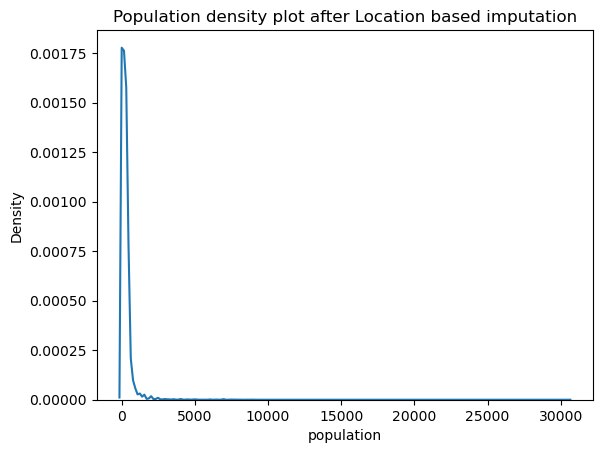

In [102]:
sns.kdeplot(data=df_xiang_zhi, x='population', fill=False)
plt.title('Population density plot after Location based imputation')
plt.show()

#### &emsp; &emsp; &emsp; 2.214 public_meeting
&emsp; &emsp; &emsp; &emsp; - Contains high mode percentage, low variance therefore not a good predictor for status_group. <br>
&emsp; &emsp; &emsp; &emsp; - Impute the missing value with a new 'Unknown' class.

In [103]:
# Replace the missing values with 'Unknown' value
df_xiang_zhi['public_meeting'].fillna('Unknown', inplace=True)

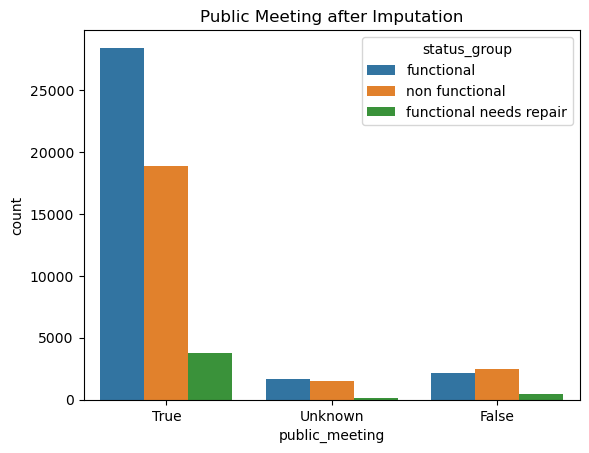

In [104]:
sns.countplot(data=df_xiang_zhi, x='public_meeting', hue='status_group')
plt.title('Public Meeting after Imputation')
plt.show()

#### &emsp; &emsp; &emsp; 2.215 scheme_management
&emsp; &emsp; &emsp; &emsp; - Impute scheme_management using similar features such as management and management group. <br>
&emsp; &emsp; &emsp; &emsp; - First, assign 'Other' to the missing values of scheme_name then encode the mentionned features follow by multivariate imputation.

In [105]:
# Similar features as scheme_management
management_columns = ['management', 'management_group', 'scheme_management']

# Create a temporary dataframe containing the relevant feature for scheme_management imputation
df_management = df_xiang_zhi[management_columns]

# Replace the 'None' value with 'Nan'
df_management.loc[df_management['scheme_management'] == 'None', 'scheme_management'] = np.nan
df_management

,management,management_group,scheme_management
0,vwc,user-group,VWC
1,wug,user-group,Other
2,vwc,user-group,VWC
3,vwc,user-group,VWC
4,other,other,NaN
...,...,...,...
59395,water board,user-group,Water Board
59396,vwc,user-group,VWC
59397,vwc,user-group,VWC
59398,vwc,user-group,VWC


In [106]:
multi_label_encoder = MultiColumnLabelEncoder(columns=management_columns)

df_management = df_management.astype(str)
# Encode the categorical features of the dataframe
df_management = multi_label_encoder.fit_transform(df_management)

In [107]:
# Missing value's encoding
management_missing_value = df_management['scheme_management'].max()

# Encode missing values using Multivariate imputer
mult_imputer = IterativeImputer(estimator=RandomForestClassifier(), max_iter=10, missing_values=management_missing_value, initial_strategy='most_frequent', random_state=42)

df_management = mult_imputer.fit_transform(df_management)

In [108]:
df_management = pd.DataFrame(df_management, columns=management_columns)
df_management

,management,management_group,scheme_management
0,7.0,4.0,6.0
1,7.0,4.0,1.0
2,7.0,4.0,6.0
3,7.0,4.0,6.0
4,1.0,1.0,1.0
...,...,...,...
59395,9.0,4.0,9.0
59396,7.0,4.0,6.0
59397,7.0,4.0,6.0
59398,7.0,4.0,6.0


In [109]:
df_management = df_management.astype(int)
# Reverse the encoding process for distribution visualisation
df_management = multi_label_encoder.inverse_transform(df_management)

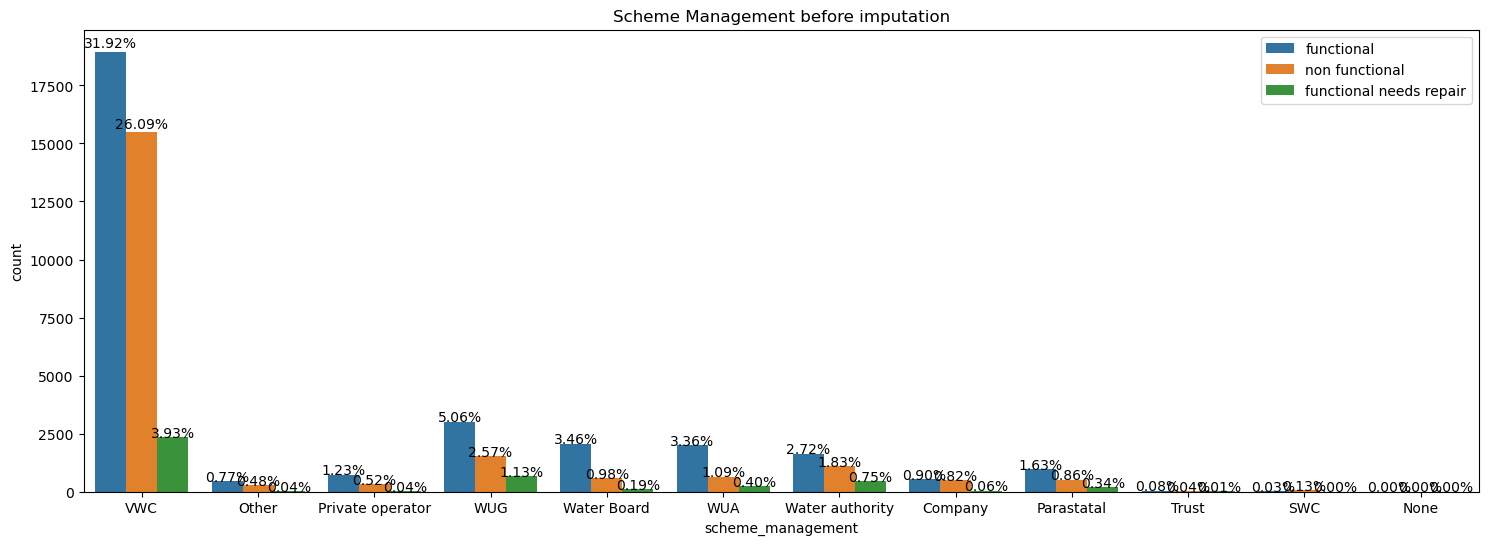

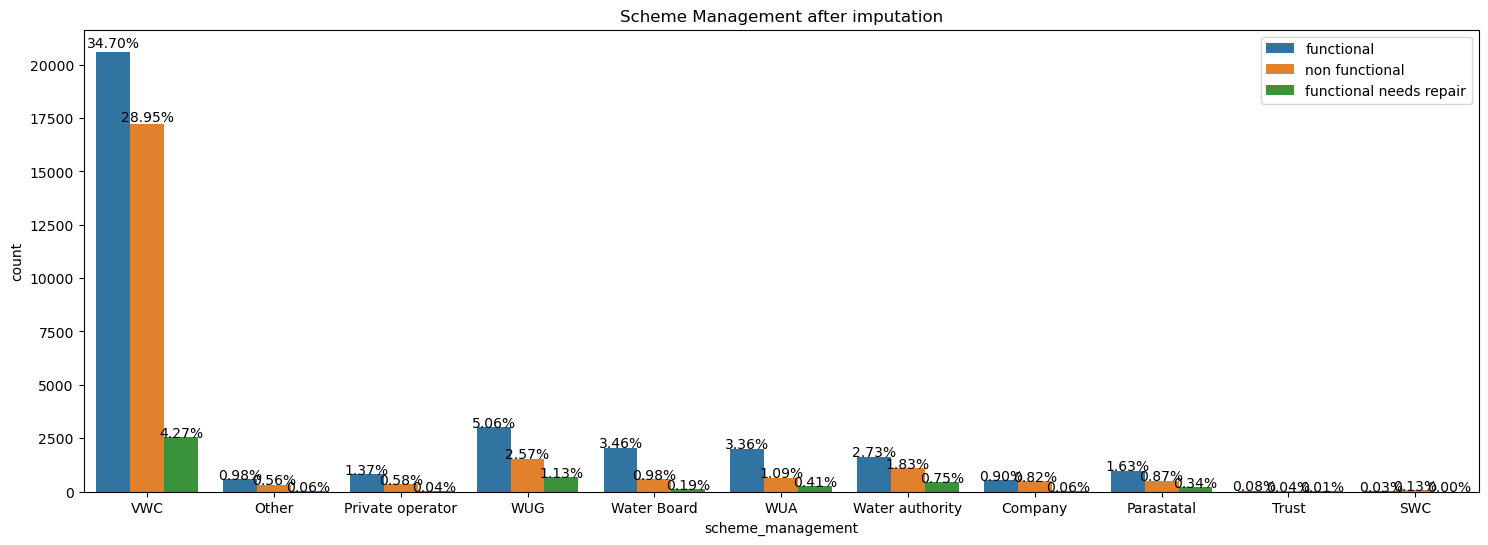

In [110]:
# Show the distribution before and after the imputation
countplot_w_percentage(df_xiang_zhi, (18, 6), 'scheme_management', 'status_group', 'Scheme Management before imputation', 'upper right')
df_management['status_group'] = df_xiang_zhi['status_group']
countplot_w_percentage(df_management, (18, 6), 'scheme_management', 'status_group', 'Scheme Management after imputation', 'upper right')

In [111]:
# Assigned the imputed scheme_management column to the original dataframe
df_xiang_zhi['scheme_management'] = df_management['scheme_management']

#### &emsp; &emsp; &emsp; 2.216 permit
&emsp; &emsp; &emsp; &emsp; - Impute the missing value with a new 'Unknown' class.

In [112]:
# Replace the missing values with 'Unknown' value
df_xiang_zhi['permit'].fillna('Unknown', inplace=True)

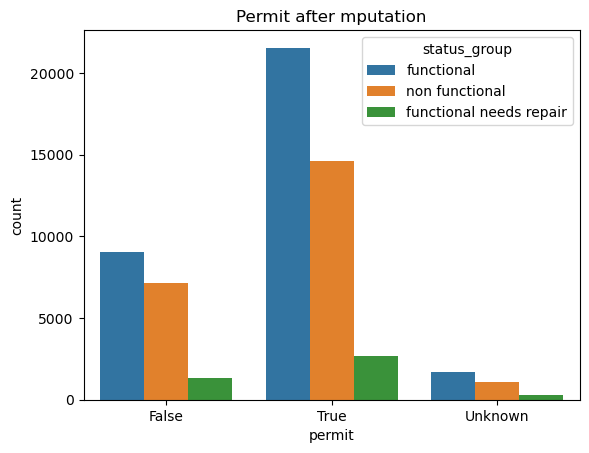

In [113]:
sns.countplot(data=df_xiang_zhi, x='permit', hue='status_group')
plt.title('Permit after mputation')
plt.show()

#### &emsp; &emsp; &emsp; 2.217 construction_year
&emsp; &emsp; &emsp; &emsp; - Impute the missing values with mean of contruction year.

In [114]:
# Replace the missing values with 'Nan' value
df_xiang_zhi['construction_year'].replace(0, np.nan, inplace=True)
df_xiang_zhi['construction_year'].fillna(round(df_xiang_zhi['construction_year'].mean(axis=0, skipna=True)), inplace=True)

<a id='feature_binning_and_discretisation_xz'></a>
### &emsp; &emsp; 2.22 Feature Binning & Discretisation

#### &emsp; &emsp; &emsp; 2.221 funder & installer

In [115]:
# Convert funder and installer values to lowercase
df_xiang_zhi['funder'] = df_xiang_zhi['funder'].str.lower()
df_xiang_zhi['installer'] = df_xiang_zhi['installer'].str.lower()

In [116]:
# Display the 30 most frequent funder and installer values
print('Funder')
print(df_xiang_zhi['funder'].value_counts(dropna=False).head(30), '\n')

print('Installer')
print(df_xiang_zhi['installer'].value_counts(dropna=False).head(30))

Funder
government of tanzania    9084
NaN                       3635
danida                    3114
hesawa                    2202
rwssp                     1374
world bank                1349
kkkt                      1287
world vision              1246
unicef                    1057
tasaf                      877
district council           843
dhv                        829
private individual         826
dwsp                       811
0                          777
norad                      765
germany republi            610
tcrs                       602
ministry of water          590
water                      583
dwe                        484
netherlands                470
hifab                      450
adb                        448
lga                        442
amref                      425
fini water                 393
oxfam                      359
wateraid                   333
rc church                  321
Name: funder, dtype: int64 

Installer
dwe                   17

In [117]:
# Apply binning function to each row of installer and funder value
df_xiang_zhi['installer_group'] = df_xiang_zhi['installer'].apply(lambda value: funder_installer_binning(value))
df_xiang_zhi['funder_group'] = df_xiang_zhi['funder'].apply(lambda value: funder_installer_binning(value))

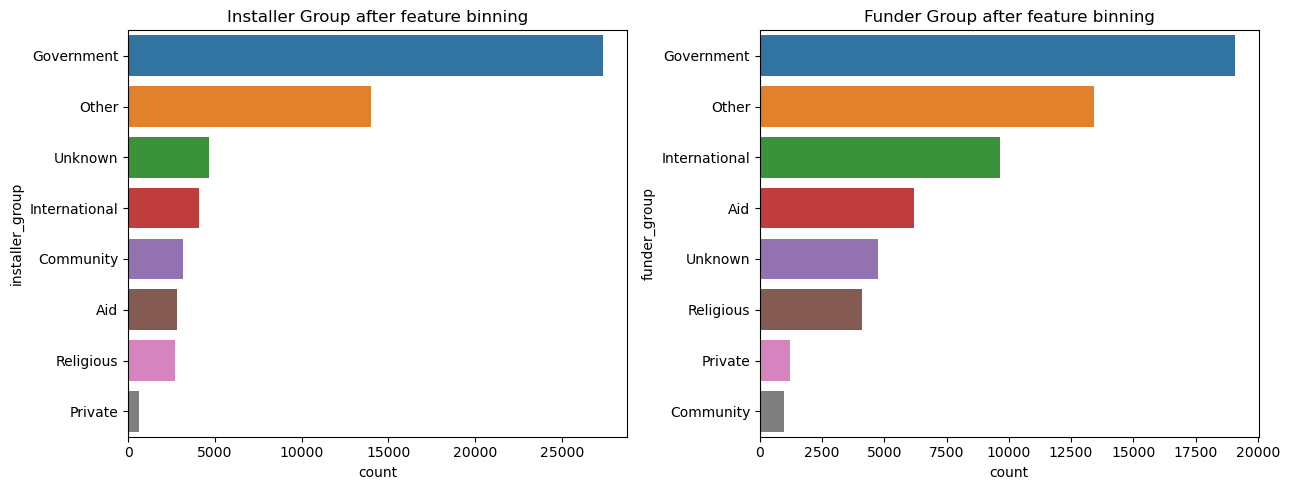

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
sns.countplot(data=df_xiang_zhi, y='installer_group', 
              order=df_xiang_zhi['installer_group'].value_counts().index, ax=ax[0])
ax[0].set_title('Installer Group after feature binning')

sns.countplot(data=df_xiang_zhi, y='funder_group', 
              order=df_xiang_zhi['funder_group'].value_counts().index, ax=ax[1])
ax[1].set_title('Funder Group after feature binning')

plt.tight_layout()
plt.show()

#### &emsp; &emsp; &emsp; 2.222 construction_year

In [119]:
# Code adapted from: https://dfrieds.com/data-analysis/bin-values-python-pandas.html
# Binning condition: (-1, 1959] exclusive -1, inclusive 1959
df_xiang_zhi['construction_by_decade'] = pd.cut(
    x=df_xiang_zhi['construction_year'],
    bins=[1959, 1969, 1979, 1989, 1999, 2009, 2019],
    labels=['60s', '70s', '80s', '90s', '00s', '10s'])

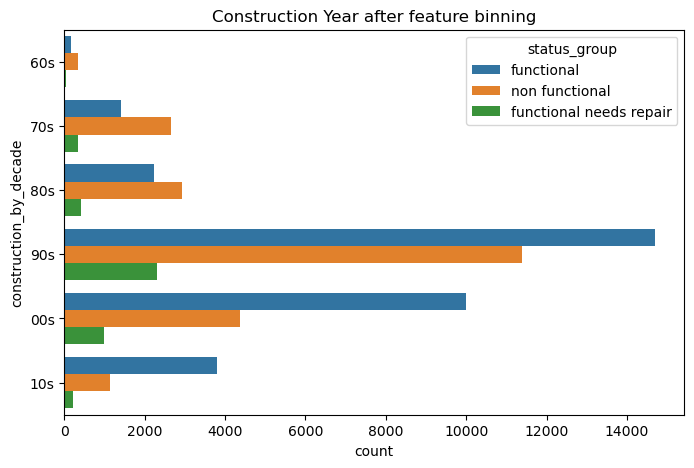

In [120]:
plt.subplots(figsize=(8, 5))
sns.countplot(data=df_xiang_zhi, y='construction_by_decade', hue='status_group')
plt.title('Construction Year after feature binning')
plt.show()

<a id='feature_engineering_and_combination_xz'></a>
### &emsp; &emsp; 2.23 Feature Engineering & Combination

#### &emsp; &emsp; &emsp; 2.231 missing_tsh

In [121]:
df_xiang_zhi['missing_tsh'] = np.where(df_xiang_zhi['amount_tsh'] == 0, 1, 0)

#### &emsp; &emsp; &emsp; 2.232 year_month_recorded
&emsp; &emsp; &emsp; &emsp; - only preserve the information of year and month from date_recorded feature.

In [122]:
# Create two new respective columns for date_recorded's year & month
df_xiang_zhi['year_recorded'] = pd.DatetimeIndex(df_xiang_zhi['date_recorded']).year
df_xiang_zhi['month_recorded'] = pd.DatetimeIndex(df_xiang_zhi['date_recorded']).month

# Combine the value of year with month separated by a '-'
df_xiang_zhi['year_month_recorded'] = df_xiang_zhi['year_recorded'].map(str) + '-' + df_xiang_zhi['month_recorded'].map(str)

# Drop the redundant columns for year_month_recorded feature's imputation
df_xiang_zhi = df_xiang_zhi.drop(columns=['year_recorded', 'month_recorded'])

#### &emsp; &emsp; &emsp; 2.233 region_code_district_code
&emsp; &emsp; &emsp; &emsp; - combine region_code with district_code.

In [123]:
# Combine the value of region_code with district_code separated by a '-'
df_xiang_zhi['region_code_district_code'] = df_xiang_zhi['region'] + '-' + df_xiang_zhi['region_code'].map(str) + '-' + df_xiang_zhi['district_code'].map(str)

<a id='drop_featues_xz'></a>
### &emsp; &emsp; 2.24 Drop Features

In [124]:
features_to_drop = ['id', 'wpt_name', 'subvillage', 'ward', 'num_private', 'recorded_by', 
                    'management_group', 'scheme_name', 'lga', 'extraction_type_class', 
                    'extraction_type_group', 'payment_type', 'quality_group', 'quantity_group', 
                    'source_class', 'source_type', 'waterpoint_type_group', 'basin',
                    # feature engineered / feature combination
                    'date_recorded', 'installer', 'funder', 'region', 'district_code', 
                    'construction_year', 'amount_tsh', 'region_code',
                    # target value
                    'status_group']

df_imputed = df_xiang_zhi.drop(columns=features_to_drop)

<a id='datatype_transformation_xz'></a>
### &emsp; &emsp; 2.25 Datatype Transformation

In [125]:
# Convert float to int
df_imputed['gps_height'] = df_imputed['gps_height'].astype(int)
df_imputed['population'] = df_imputed['population'].astype(int)


# convert features' datatype to string
features_to_str = ['permit', 'public_meeting', 'construction_by_decade']

for feature in features_to_str:
    df_imputed[feature] = df_imputed[feature].astype(str)

<a id='numerical_feature_normalisation_xz'></a>
### &emsp; &emsp; 2.26 Numerical Feature Normalisation

In [126]:
df_imputed['gps_height'] = zscore(df_imputed['gps_height'])
df_imputed['population'] = zscore(df_imputed['population'])

<a id='target_value_and_categorical_feature_encoding_xz'></a>
### &emsp; &emsp; 2.27 Target Value & Categorical Feature Encoding

In [127]:
categorical_features = []

# store categorical type features
for column in df_imputed.columns:
    if df_imputed[column].dtype == 'object':
        categorical_features.append(column)
        
categorical_features

['public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'management',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'installer_group',
 'funder_group',
 'construction_by_decade',
 'year_month_recorded',
 'region_code_district_code']

In [128]:
df_imputed = MultiColumnLabelEncoder(columns=categorical_features).fit_transform(df_imputed)
df_imputed

,gps_height,longitude,latitude,population,public_meeting,scheme_management,permit,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,installer_group,funder_group,construction_by_decade,missing_tsh,year_month_recorded,region_code_district_code
0,0.532076,34.938093,-9.856322,-0.360330,1,6,0,3,7,2,6,1,8,1,6,6,5,0,15,20
1,0.548919,34.698766,-2.147466,-0.001684,2,1,1,3,11,0,6,2,5,1,4,4,1,1,31,55
2,-0.785416,37.460664,-3.821329,-0.064604,1,6,1,3,7,4,6,1,0,2,0,0,0,0,30,52
3,-1.577034,38.486161,-11.155298,-0.467295,1,6,1,14,7,0,6,0,3,2,0,0,4,1,26,75
4,0.417919,31.130847,-1.825359,0.082210,1,1,1,3,1,0,6,3,5,1,4,4,5,1,19,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0.195217,37.169807,-3.253847,-0.326773,1,9,1,3,9,4,6,1,8,1,3,3,5,0,33,38
59396,0.198960,35.249991,-9.070629,-0.471489,1,6,1,3,7,2,6,1,6,1,4,4,5,0,17,19
59397,-0.033098,34.017087,-8.750434,-0.379206,1,6,0,15,7,3,1,1,3,4,7,7,5,1,16,65
59398,-0.033098,35.861315,-6.378573,-0.379206,1,6,1,8,7,0,6,2,7,4,4,4,5,1,15,13


In [129]:
# This function encode 'status_group' by representing functional as 0, repair as 1, non functional as 2
def target_value_encoding(row):
    classes = {'functional': 0, 'functional needs repair': 1, 'non functional': 2}
    return classes[row['status_group']]

df_imputed['status_group'] = df_xiang_zhi.apply(lambda row: target_value_encoding(row), axis=1)
df_imputed['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

####  &emsp; &emsp; &emsp; Summary of Data

In [130]:
df_cleaned_xiang_zhi = df_imputed.copy()

summary_df = eda.df_info(df_cleaned_xiang_zhi)
display_all(summary_df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
gps_height,float64,Numerical,2368,"[0.5320763054285026, 0.548919246977196, -0.785...",0,0.0
longitude,float64,Numerical,57524,"[34.93809275, 34.6987661, 37.46066446, 38.4861...",0,0.0
latitude,float64,Numerical,57525,"[-9.85632177, -2.14746569, -3.82132853, -11.15...",0,0.0
population,float64,Numerical,1053,"[-0.360330074056652, -0.0016837037203895945, -...",0,0.0
public_meeting,int32,Numerical,3,"[1, 2, 0]",0,0.0
scheme_management,int32,Numerical,11,"[6, 1, 3, 8, 9, 7, 10, 0, 2, 5]",0,0.0
permit,int32,Numerical,3,"[0, 1, 2]",0,0.0
extraction_type,int32,Numerical,18,"[3, 14, 15, 8, 4, 9, 6, 7, 17, 0]",0,0.0
management,int32,Numerical,12,"[7, 11, 1, 4, 9, 10, 0, 8, 3, 6]",0,0.0
payment,int32,Numerical,7,"[2, 0, 4, 6, 5, 1, 3]",0,0.0


---
<a id='eda'></a>
# 3. Exploratory Data Analysis (EDA)
###### &emsp; &emsp; &emsp; &nbsp; &nbsp;[Table of Contents](#table_of_contents)

---
<a id='model_development'></a>
# 4. Model Development
###### &emsp; &emsp; &emsp; &nbsp; &nbsp;[Table of Contents](#table_of_contents)

<a id='baseline_models_overview'></a>
## &emsp; 4.1 Baseline Models Overview

<a id='hyperparameter_tuning'></a>
## &emsp; 4.2 Hyperparameter tuning

---
<a id='model_evaluation'></a>
# 5. Model Evaluation
###### &emsp; &emsp; &emsp; &nbsp; &nbsp;[Table of Contents](#table_of_contents)

<a id='k_fold_cross_validation'></a>
## &emsp; 5.1 K-fold Cross Validation

<a id='f1_score'></a>
## &emsp; 5.2 F1 Score

<a id='confusion_matrix'></a>
## &emsp; 5.3 Confusion Matrix

<a id='roc'></a>
## &emsp; 5.4 ROC

---
<a id='model_deployment'></a>
# 6. Model Deployment


###### &emsp; &emsp; &emsp; &nbsp; &nbsp;[Table of Contents](#table_of_contents)